<a href="https://colab.research.google.com/github/LeToyek/2141720085-pcvk-2023/blob/main/Week07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WEEK 7 - Filtering

Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa
menggunakan library atau metode konvolusi dari OpenCV.

1. Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan

In [53]:
from google.colab import drive

drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi.
Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan
padding.

In [54]:
def convolutional2d(image,kernel,stride,padding):


  image_height, image_width = image.shape
  kernel_height, kernel_width = kernel.shape
  # Calculate the output size
  output_height = (image_height - kernel_height + 2 * padding) // stride + 1
  output_width = (image_width - kernel_width + 2 * padding) // stride + 1
  # Initialize the output with zeros
  output = np.zeros((output_height, output_width))
  # Apply the convolution operation
  for i in range(0, image_height - kernel_height + 1, stride):
      for j in range(0, image_width - kernel_width + 1, stride):
          image_patch = image[i:i + kernel_height, j:j + kernel_width]
          output[i,j] = np.sum(image_patch * kernel)
  return output

3. Load citra yang akan diproses dan ubah menjadi citra keabuan

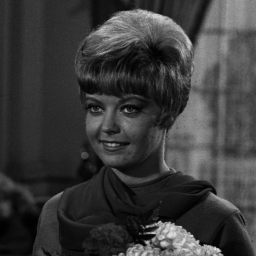

In [55]:
img = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

cv2_imshow(img_gray)

4. Tentukan kernel yang akan digunakan, contohnya kernel untuk filter sharpening
sebagai berikut:

**sharpen**

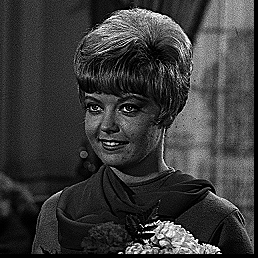

In [56]:

kernel_sharpen = np.array([
    [0,-1,0],
    [-1,5,-1],
    [0,-1,0]
])
cv2_imshow(convolutional2d(img_gray,kernel_sharpen,1,2))

**emboss**

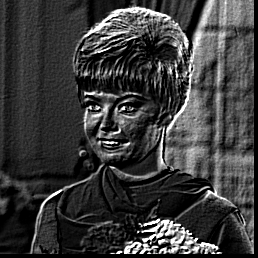

In [57]:
kernel_emboss = np.array([
  [-2,-1,0],
  [-1,1,1],
  [0,1,2],
])
cv2_imshow(convolutional2d(img_gray,kernel_emboss,1,2))

**Left Sobel Edge Detection**

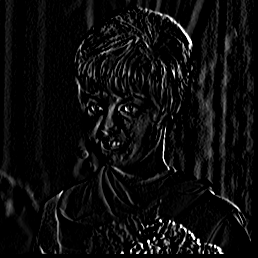

In [58]:
kernel_lsed = np.array(
    [
  [1,0,-1],
  [2,0,-2],
  [1,0,-1],
]
)
cv2_imshow(convolutional2d(img_gray,kernel_lsed,1,2))

**Canny Edge Detection**

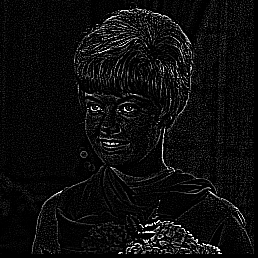

In [59]:
kernel_canny= np.array([
  [-1,-1,-1],
  [-1,8,-1],
  [-1,-1,-1]
  ])

cv2_imshow(convolutional2d(img_gray,kernel_canny,1,2))

**Prewitt Edge Detection**

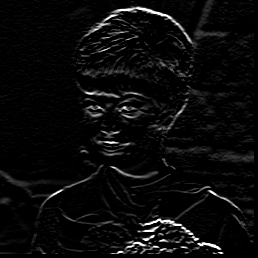

In [62]:
kernel_prewitt= np.array([
  [-1,-1,-1],
  [0,0,0],
  [1,1,1]
])

cv2_imshow(convolutional2d(img_gray,kernel_prewitt,1,2))

**Gaussian**

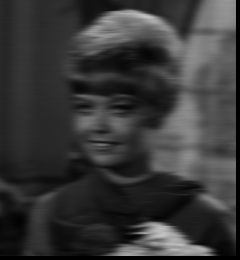

In [61]:
def gaussian(kernel_size):
  sigma=math.sqrt(kernel_size)

  return cv.getGaussianKernel(kernel_size, sigma).transpose()

kernel_gauss = gaussian(21)

cv2_imshow(convolutional2d(img_gray,kernel_gauss,1,2))